```{hint}
✨✨✨ **Run this notebook on Google Colab** ✨✨✨

You can [run this notebook yourself with Google Colab](https://colab.research.google.com/github/Eventual-Inc/Daft/blob/main/docs/source/10-min.ipynb)!
```

# 10 minutes Quickstart

This is a short introduction to all the main functionality in Daft, geared towards new users.

## What is Daft?
Daft is a distributed query engine built for running ETL, analytics, and ML/AI workloads at scale. Daft is implemented in Rust (fast!) and exposes a familiar Python dataframe API (friendly!). 

In this Quickstart you will learn the basics of Daft’s DataFrame API and the features that set it apart from frameworks like pandas, pySpark, Dask and Ray. You will build a small database of dog owners and their fluffy companions and see how you can use Daft to download images from URLs, run an ML classifier and call custom UDFs, all within an interactive DataFrame interface. Woof! 🐶

## When Should I use Daft?

Daft is the right tool for you if you are working with any of the following:
- **Large datasets** that don't fit into memory or would benefit from parallelization
- **Multimodal data types** such as images, JSON, vector embeddings, and tensors
- **Formats that support data skipping** through automatic partition pruning and stats-based file pruning for filter predicates
- **ML workloads** that would benefit from interactive computation within DataFrame (via UDFs)

Read more about how Daft compares to other DataFrames [here](https://www.getdaft.io/projects/docs/en/latest/faq/dataframe_comparison.html).

Let's jump in! 🪂

## Install and Import Daft

You can install Daft using `pip`:

In [1]:
!pip install -U getdaft

  Using cached getdaft-0.2.20-cp37-abi3-macosx_11_0_arm64.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 243.0 kB/s eta 0:00:00m eta 0:00:010:00:02
  Attempting uninstall: getdaft
    Found existing installation: getdaft 0.2.19
    Uninstalling getdaft-0.2.19:
      Successfully uninstalled getdaft-0.2.19


And then import Daft and one of its classes which we'll need later on:

In [2]:
import daft
from daft import DataType

## Create your first Daft DataFrame

See also: [API Reference: DataFrame Construction](df-input-output)

To begin, let's create a DataFrame from a dictionary of columns:

In [3]:
import datetime

df = daft.from_pydict({
    "integers": [1, 2, 3, 4],
    "floats": [1.5, 2.5, 3.5, 4.5],
    "bools": [True, True, False, False],
    "strings": ["a", "b", "c", "d"],
    "bytes": [b"a", b"b", b"c", b"d"],
    "dates": [datetime.date(1994, 1, 1), datetime.date(1994, 1, 2), datetime.date(1994, 1, 3), datetime.date(1994, 1, 4)],
    "lists": [[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]],
    "nulls": [None, None, None, None],
})

df

integersInt64,floatsFloat64,boolsBoolean,stringsUtf8,bytesBinary,datesDate,listsList[Int64],nullsNull
1,1.5,true,a,"b""a""",1994-01-01,"[1, 1, 1]",None
2,2.5,true,b,"b""b""",1994-01-02,"[2, 2, 2]",None
3,3.5,false,c,"b""c""",1994-01-03,"[3, 3, 3]",None
4,4.5,false,d,"b""d""",1994-01-04,"[4, 4, 4]",None


### Multimodal Data Types

Daft is built for multimodal data type support. Daft DataFrames can contain more data types than other DataFrame APIs like pandas, Spark or Dask. Daft columns can contain URLs, images, tensors and Python classes. You'll get to work with some of these data types in a moment.

For a complete list of supported data types see: [API Reference: DataTypes](datatypes)

### Data Sources

You can also load DataFrames from other sources, such as:

1. CSV files: {func}`daft.read_csv("s3://bucket/*.csv") <daft.read_csv>`
2. Parquet files: {func}`daft.read_parquet("/path/*.parquet") <daft.read_parquet>`
3. JSON line-delimited files: {func}`daft.read_json("/path/*.parquet") <daft.read_json>`
4. Files on disk: {func}`daft.from_glob_path("/path/*.jpeg") <daft.from_glob_path>`

Daft automatically supports local paths as well as paths to object storage such as AWS S3:

```
df = daft.read_json("s3://path/to/bucket/file.jsonl)
```

See [User Guide: Integrations]() to learn more about working with other formats like Delta Lake and Iceberg.

## Who likes puppies? 😍🐶 

Let's find some more fun data to work with :)

We'll read in a Parquet file from a public S3 bucket. Note that this Parquet file is partitioned on the `country` column. This will be important later on.
- predicate pushdown filtering
- parallel partition processing

In [3]:
# Read partitioned Parquet file from S3 
# will show no contents >>

In [4]:
df = daft.from_pydict({
    "first_name": ["Ernesto", "Sari", "Wolfgang", "Jackie", "Zoya"],
    "last_name":["Evergreen", "Salama", "Winter", "Jale", "Zee"],
    "age": [34, 57, 23, 62, 40],
    "DoB": [datetime.date(1990,4,3), datetime.date(1967,1,2), datetime.date(2001,2,12), datetime.date(1962,3,24), datetime.date(1984,4,7)],
    "country": ["Canada", "United Kingdom", "Germany", "Canada", "United Kingdom"],
    "has_dog": [True, True, None, True, True],
})

df

first_nameUtf8,last_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean
Ernesto,Evergreen,34,1990-04-03,Canada,true
Sari,Salama,57,1967-01-02,United Kingdom,true
Wolfgang,Winter,23,2001-02-12,Germany,None
Jackie,Jale,62,1962-03-24,Canada,true
Zoya,Zee,40,1984-04-07,United Kingdom,true


In [5]:
df.write_parquet("owners", partition_cols=["country"])

/Users/rpelgrim/miniforge3/envs/daft/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pathUtf8,countryUtf8
owners/country=Canada/b29afea7-1210-462a-aaf6-38e9f698edd3-0.parquet,Canada
owners/country=Germany/6a87eba4-ef86-4916-be05-eebdc6f58cf5-0.parquet,Germany
owners/country=United Kingdom/3220f4ba-b9a2-4cc1-9b27-409a2b2da193-0.parquet,United Kingdom


In [4]:
# change this to s3 read for final version
df = daft.read_parquet("owners/*/*")
df

first_nameUtf8,last_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean


## Executing and Displaying Data

Daft DataFrames are lazy by default. This means that the contents will not be computed ("materialized") unless you explicitly tell Daft to do so. This is best practice for working with larger-than-memory datasets and parallel/distributed architectures.

The file we have just loaded only has XX rows. You can materialize the whole DataFrame in memory easily using the `.collect` method:

In [5]:
df.collect()

/Users/rpelgrim/miniforge3/envs/daft/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


first_nameUtf8,last_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean
Sari,Salama,57,1967-01-02,United Kingdom,true
Zoya,Zee,40,1984-04-07,United Kingdom,true
Wolfgang,Winter,23,2001-02-12,Germany,None
Ernesto,Evergreen,34,1990-04-03,Canada,true
Jackie,Jale,62,1962-03-24,Canada,true


You can also take a look at just the first few rows with the `.show` method:

In [6]:
df.show(3)

first_nameUtf8,last_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean
Sari,Salama,57,1967-01-02,United Kingdom,true
Zoya,Zee,40,1984-04-07,United Kingdom,true
Wolfgang,Winter,23,2001-02-12,Germany,None


Use `.show` for quick visualisation in an interactive notebook. To use a limited number of rows for further transformation, use the {meth}`.limit <daft.DataFrame.limit>` method.

## Basic DataFrame Operations

Let's take a look at some of the most common DataFrame operations.

### Selecting Data

You can **select** specific columns from your DataFrame with the `.select` method:

In [7]:
df.select("first_name", "has_dog").show()

first_nameUtf8,has_dogBoolean
Sari,true
Zoya,true
Wolfgang,None
Ernesto,true
Jackie,true


### Excluding Data

You can **limit** the number of rows in a dataframe by calling {meth}`df.limit() <daft.DataFrame.limit>`:

In [8]:
df.limit(1).show()

first_nameUtf8,last_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean
Sari,Salama,57,1967-01-02,United Kingdom,true


Note that `limit` is lazy so you will need to pair it with a `show` or `collect` method to see the results in a notebook.

To **drop** columns from the dataframe, call {meth}`df.exclude() <daft.DataFrame.exclude>`:

In [9]:
df.exclude("DoB").show()

first_nameUtf8,last_nameUtf8,ageInt64,countryUtf8,has_dogBoolean
Sari,Salama,57,United Kingdom,true
Zoya,Zee,40,United Kingdom,true
Wolfgang,Winter,23,Germany,None
Ernesto,Evergreen,34,Canada,true
Jackie,Jale,62,Canada,true


### Sorting Data

You can **sort** a dataframe with {meth}`df.sort() <daft.DataFrame.sort>`, which we do so here in descending order:

In [10]:
df.sort(df["age"], desc=False).show()

first_nameUtf8,last_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean
Wolfgang,Winter,23,2001-02-12,Germany,None
Ernesto,Evergreen,34,1990-04-03,Canada,true
Zoya,Zee,40,1984-04-07,United Kingdom,true
Sari,Salama,57,1967-01-02,United Kingdom,true
Jackie,Jale,62,1962-03-24,Canada,true


### Grouping and Aggregating Data

You can **group** and **aggregate** your data using the {meth}`df.groupby() <daft.DataFrame.groupby>` method:

Groupby aggregation operations over a dataset happens in 2 phases:

1. Splitting the data into groups based on some criteria using {meth}`df.groupby() <daft.DataFrame.groupby>`
2. Specifying how to aggregate the data for each group using {meth}`GroupedDataFrame.agg() <daft.dataframe.dataframe.GroupedDataFrame.agg>`

For example:

In [11]:
df.select(df["country"], df["first_name"].alias("counts")).groupby(df["country"]).count().show()

countryUtf8,countsUInt64
Canada,2
Germany,1
United Kingdom,2


Note that we can use {meth}`.alias() <daft.expressions.Expression.alias>` to quickly rename columns.

### Missing Data

All columns in Daft are "nullable" by default. Unlike other frameworks such as Pandas, Daft differentiates between "null" (missing) and "nan" (stands for not a number - a special value indicating an invalid float).

In [12]:
missing_data_df = daft.from_pydict({
    "floats": [1.5, None, float("nan")],
})
missing_data_df = missing_data_df \
    .with_column("floats_is_null", missing_data_df["floats"].is_null()) \
    .with_column("floats_is_nan", missing_data_df["floats"].float.is_nan())

missing_data_df.show()

floatsFloat64,floats_is_nullBoolean,floats_is_nanBoolean
1.5,false,false
None,true,None
NaN,false,true


Let's correct the one missing value in our dataset:

In [13]:
df = df.with_column("has_dog", df["has_dog"].apply(lambda x: True, return_dtype=DataType.bool()))
df.show()

first_nameUtf8,last_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean
Sari,Salama,57,1967-01-02,United Kingdom,true
Zoya,Zee,40,1984-04-07,United Kingdom,true
Wolfgang,Winter,23,2001-02-12,Germany,true
Ernesto,Evergreen,34,1990-04-03,Canada,true
Jackie,Jale,62,1962-03-24,Canada,true


### Filtering Data

You can **filter** rows in your DataFrame with a predicate using the {meth}`df.where() <daft.DataFrame.where>` method:

In [14]:
df.where(df["age"] > 35).show()

first_nameUtf8,last_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean
Sari,Salama,57,1967-01-02,United Kingdom,true
Zoya,Zee,40,1984-04-07,United Kingdom,true
Jackie,Jale,62,1962-03-24,Canada,true


Filtering can give you powerful optimization when you are working with partitioned files or tables. Daft will use the predicate to read only the necessary partitions, skipping any data that is not relevant.

For example, our Parquet file is partitioned on the `country` column. This means that queries with a `country` predicate will benefit from query optimization:

In [15]:
df.where(df["country"] == "Canada").show()

first_nameUtf8,last_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean
Ernesto,Evergreen,34,1990-04-03,Canada,true
Jackie,Jale,62,1962-03-24,Canada,true


Daft only needs to read in 1 file for this query, instead of 3.

## Query Planning

As mentioned earlier, Daft is lazy: computations on your DataFrame are not executed immediately. Instead, Daft creates a `LogicalPlan` which defines the operations that need to happen to materialize the requested result. Think of this LogicalPlan as a recipe. 

You can examine this logical plan using {meth}`df.explain() <daft.DataFrame.explain>`:

In [16]:
df = daft.read_parquet("owners/*/*") #change to s3 for final
df.where(df["country"] == "Canada").explain(show_all=True)

== Unoptimized Logical Plan ==

* Filter: col(country) == lit("Canada")
|
* GlobScanOperator
|   Glob paths = [owners/*/*]
|   Coerce int96 timestamp unit = Nanoseconds
|   IO config = S3 config = { Max connections = 8, Retry initial backoff ms = 1000, Connect timeout ms = 30000, Read timeout ms = 30000, Max retries = 25, Retry mode = adaptive, Anonymous = false, Use SSL = true, Verify SSL = true, Check hostname SSL = true, Requester pays = false }, Azure config = { Anoynmous = false, Use SSL = true }, GCS config = { Anoynmous = false }
|   Use multithreading = true
|   File schema = first_name#Utf8, last_name#Utf8, age#Int64, DoB#Date, country#Utf8, has_dog#Boolean
|   Partitioning keys = []
|   Output schema = first_name#Utf8, last_name#Utf8, age#Int64, DoB#Date, country#Utf8, has_dog#Boolean


== Optimized Logical Plan ==

* GlobScanOperator
|   Glob paths = [owners/*/*]
|   Coerce int96 timestamp unit = Nanoseconds
|   IO config = S3 config = { Max connections = 8, Retry initial ba

Daft creates 3 types of plans:
1. an **unoptimized Logical Plan**, to sketch out the rough steps
2. an **optimized Logical Plan**, to maximise performance
3. a **Physical Plan**, which maps the logical plan to the physical files

Because we are filtering our DataFrame on the partition column `country`, Daft can optimize the Logical Plan and save us time and computing resources by only reading a single partition from disk.

Read more about Query Planning and Partitioning in the [documentation](md-link).

Use {meth}`df.collect() <daft.DataFrame.collect>` to execute computations on **all** your data and get a little preview of the materialized results. The results are kept in memory so that subsequent operations will avoid recomputations.

## Expressions

See: [Expressions](user_guide/basic_concepts/expressions.rst)

Expressions are an API for defining computation that needs to happen over your columns.

For example, use the `daft.col()` expression together with the `with_column` method to create a new column `full_name`, joining the contents of the `last_name` column to the `first_name` column:

In [17]:
df_owners = df.with_column("full_name", daft.col('first_name') + ' ' + daft.col('last_name'))
df_owners.select("full_name", "age", "country", "has_dog").show()

full_nameUtf8,ageInt64,countryUtf8,has_dogBoolean
Sari Salama,57,United Kingdom,true
Zoya Zee,40,United Kingdom,true
Ernesto Evergreen,34,Canada,true
Jackie Jale,62,Canada,true
Wolfgang Winter,23,Germany,None


Some Expression methods are only allowed on certain types and are accessible through "method accessors" such as the {meth}`.str <daft.expressions.Expression.str>` accessor (see: [Expression Accessor Properties](expression-accessor-properties)).

For example, the {meth}`.str.length() <daft.expressions.expressions.ExpressionStringNamespace.length>` expression is only valid when run on a String column:

In [18]:
df_owners_year = df_owners.with_column("DoB_year", df["DoB"].dt.year())
df_owners_year.show()

first_nameUtf8,last_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean,full_nameUtf8,DoB_yearInt32
Ernesto,Evergreen,34,1990-04-03,Canada,true,Ernesto Evergreen,1990
Jackie,Jale,62,1962-03-24,Canada,true,Jackie Jale,1962
Sari,Salama,57,1967-01-02,United Kingdom,true,Sari Salama,1967
Zoya,Zee,40,1984-04-07,United Kingdom,true,Zoya Zee,1984
Wolfgang,Winter,23,2001-02-12,Germany,None,Wolfgang Winter,2001


You've made it half-way! Time to bring in some fluffy beings 🐶

In the next section you will learn about some of Daft's more advanced features. You will join the existing `owners` DataFrame to their `dogs` and learn how to work with multimodal data types like URLs and Images. You will also explore how User-Defined Functions can help you perform custom transformations and ML workloads within your DataFrame.

## More Advanced Operations

Let's bring all of the elements you've learned so far together to see how you can use Daft to:
- perform more advanced operations like **joins**
- work with **multimodal data** like Python classes, URLs, and Images,
- apply **custom User-Defined Functions** to your columns,
- and **run ML workloads** within your DataFrame,

### Merging DataFrames

DataFrames can be joined with {meth}`df.join() <daft.DataFrame.join>`.

Let's use a join to reunite our `owners` with their sweet fluffy companions. We'll create a `dogs` DataFrame from a Python dictionary and then join this to our existing 

In [19]:
# TO DO use stable URLs 
df_dogs = daft.from_pydict({
    "urls": [
        "https://i.natgeofe.com/n/4f5aaece-3300-41a4-b2a8-ed2708a0a27c/domestic-dog_thumb_square.jpg?wp=1&w=272&h=272",
        "https://i.pinimg.com/736x/ab/e5/5f/abe55ff1a275ae726657fb1d03a37a97.jpg",
        "https://kb.rspca.org.au/wp-content/uploads/2018/11/golder-retriever-puppy.jpeg",
        "https://www.thesprucepets.com/thmb/hxWjs7evF2hP1Fb1c1HAvRi_Rw0=/2765x0/filters:no_upscale():strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg",
        "https://www.dogstrust.org.uk/images/800x600/assets/2023-12/Web%20header%20image-dexter_outdoors_kenilworth_dogstrust.jpg"
    ],
    'full_name': ['Ernesto Evergreen', 'Jackie Jale', 'Wolfgang Winter', 'Sari Salama', 'Zoya Zee'],
    "dog_name": ["Ernie", "Jeckyll", "Wolfie", "Sally", "Zackie"],
})

In [20]:
df_family = df_owners.join(df_dogs, on="full_name").exclude("first_name", "last_name")
df_family.show()

ageInt64,DoBDate,countryUtf8,has_dogBoolean,full_nameUtf8,urlsUtf8,dog_nameUtf8
34,1990-04-03,Canada,true,Ernesto Evergreen,https://i.natgeofe.com/n/4f5aaece-3300-41a4-b2a8-ed2708a0a27c/domestic-dog_thumb_square.jpg?wp=1&w=272&h=272,Ernie
62,1962-03-24,Canada,true,Jackie Jale,https://i.pinimg.com/736x/ab/e5/5f/abe55ff1a275ae726657fb1d03a37a97.jpg,Jeckyll
23,2001-02-12,Germany,None,Wolfgang Winter,https://kb.rspca.org.au/wp-content/uploads/2018/11/golder-retriever-puppy.jpeg,Wolfie
57,1967-01-02,United Kingdom,true,Sari Salama,https://www.thesprucepets.com/thmb/hxWjs7evF2hP1Fb1c1HAvRi_Rw0=/2765x0/filters:no_upscale():strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg,Sally
40,1984-04-07,United Kingdom,true,Zoya Zee,https://www.dogstrust.org.uk/images/800x600/assets/2023-12/Web%20header%20image-dexter_outdoors_kenilworth_dogstrust.jpg,Zackie


Let's just quickly re-order the columns for easier reading:

In [21]:
df_family = df_family["full_name", "age", "DoB", "country", "has_dog", "dog_name", "urls"]
df_family.show()

full_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean,dog_nameUtf8,urlsUtf8
Ernesto Evergreen,34,1990-04-03,Canada,true,Ernie,https://i.natgeofe.com/n/4f5aaece-3300-41a4-b2a8-ed2708a0a27c/domestic-dog_thumb_square.jpg?wp=1&w=272&h=272
Jackie Jale,62,1962-03-24,Canada,true,Jeckyll,https://i.pinimg.com/736x/ab/e5/5f/abe55ff1a275ae726657fb1d03a37a97.jpg
Wolfgang Winter,23,2001-02-12,Germany,None,Wolfie,https://kb.rspca.org.au/wp-content/uploads/2018/11/golder-retriever-puppy.jpeg
Sari Salama,57,1967-01-02,United Kingdom,true,Sally,https://www.thesprucepets.com/thmb/hxWjs7evF2hP1Fb1c1HAvRi_Rw0=/2765x0/filters:no_upscale():strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg
Zoya Zee,40,1984-04-07,United Kingdom,true,Zackie,https://www.dogstrust.org.uk/images/800x600/assets/2023-12/Web%20header%20image-dexter_outdoors_kenilworth_dogstrust.jpg


### Working with Multimodal Data

Daft is built to work comfortably with multimodal data types, including URLs and Images.

You can use the `url.download()` expression to download the bytes from a URL. Let's store them in a new column using the `with_column` method:

In [22]:
df_family = df_family.with_column("image_bytes", df_dogs["urls"].url.download(on_error="null"))
df_family.show()

full_nameUtf8,ageInt64,DoBDate,countryUtf8,has_dogBoolean,dog_nameUtf8,urlsUtf8,image_bytesBinary
Ernesto Evergreen,34,1990-04-03,Canada,true,Ernie,https://i.natgeofe.com/n/4f5aaece-3300-41a4-b2a8-ed2708a0a27c/domestic-dog_thumb_square.jpg?wp=1&w=272&h=272,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
Jackie Jale,62,1962-03-24,Canada,true,Jeckyll,https://i.pinimg.com/736x/ab/e5/5f/abe55ff1a275ae726657fb1d03a37a97.jpg,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
Wolfgang Winter,23,2001-02-12,Germany,None,Wolfie,https://kb.rspca.org.au/wp-content/uploads/2018/11/golder-retriever-puppy.jpeg,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
Sari Salama,57,1967-01-02,United Kingdom,true,Sally,https://www.thesprucepets.com/thmb/hxWjs7evF2hP1Fb1c1HAvRi_Rw0=/2765x0/filters:no_upscale():strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
Zoya Zee,40,1984-04-07,United Kingdom,true,Zackie,https://www.dogstrust.org.uk/images/800x600/assets/2023-12/Web%20header%20image-dexter_outdoors_kenilworth_dogstrust.jpg,"b""\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05""..."


Great! But where's the fluffiness? 🙁

Let's turn the bytes into human-readable images using `image.decode`:

In [23]:
df_family = df_family.with_column("image", daft.col("image_bytes").image.decode())
df_family.show()

╭───────────────────┬───────┬────────────┬────────────┬────────────────────────┬────────────────────────┬──────────────╮
│ full_name         ┆ age   ┆ DoB        ┆      …     ┆ urls                   ┆ image_bytes            ┆ image        │
│ ---               ┆ ---   ┆ ---        ┆            ┆ ---                    ┆ ---                    ┆ ---          │
│ Utf8              ┆ Int64 ┆ Date       ┆ (3 hidden) ┆ Utf8                   ┆ Binary                 ┆ Image[MIXED] │
╞═══════════════════╪═══════╪════════════╪════════════╪════════════════════════╪════════════════════════╪══════════════╡
│ Ernesto Evergreen ┆ 34    ┆ 1990-04-03 ┆ …          ┆ https://i.natgeofe.com ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      │
│                   ┆       ┆            ┆            ┆ /n/4f5a…               ┆ \x10JFI…               ┆              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jackie Jale       ┆ 62    ┆ 1962-03-24 ┆ …          ┆ https://i.pinimg.com/7 ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      │
│                   ┆       ┆            ┆            ┆ 36x/ab/…               ┆ \x10JFI…               ┆              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Wolfgang Winter   ┆ 23    ┆ 2001-02-12 ┆ …          ┆ https://kb.rspca.org.a ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      │
│                   ┆       ┆            ┆            ┆ u/wp-co…               ┆ \x10JFI…               ┆              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Sari Salama       ┆ 57    ┆ 1967-01-02 ┆ …          ┆ https://www.thesprucep ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      │
│                   ┆       ┆            ┆            ┆ ets.com…               ┆ \x10JFI…               ┆              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Zoya Zee          ┆ 40    ┆ 1984-04-07 ┆ …          ┆ https://www.dogstrust. ┆ b"\xff\xd8\xff\xdb\x00 ┆ <Image>      │
│                   ┆       ┆            ┆            ┆ org.uk/…               ┆ C\x00\x…               ┆              │
╰───────────────────┴───────┴────────────┴────────────┴────────────────────────┴────────────────────────┴──────────────╯

(Showing first 5 of 5 rows)

Woof! 🐶

Daft DataFrames can also contain any Python object, such as a Python class. Let's define a Python class `dog` with a `bark` function:

In [25]:
import numpy as np

class Dog:
    def __init__(self, name):
        self.name = name
        
    def bark(self):
        return f"{self.name}!"

Let's add a barking dog to each row in our DataFrame. We'll use the `apply` Expression to run a lambda function that takes the name of each dog from the `dog_name` column and uses it to create a unique Python `Dog` class for each dog in our dataset:

In [26]:
df_family = df_family.with_column(
    "dog", 
    df_family["dog_name"].apply(lambda dog: Dog(dog), return_dtype=DataType.python())
)

df_family.show()

╭───────────────────┬───────┬────────────┬────────────┬────────────────────────┬──────────────┬────────────────────────╮
│ full_name         ┆ age   ┆ DoB        ┆      …     ┆ image_bytes            ┆ image        ┆ dog                    │
│ ---               ┆ ---   ┆ ---        ┆            ┆ ---                    ┆ ---          ┆ ---                    │
│ Utf8              ┆ Int64 ┆ Date       ┆ (4 hidden) ┆ Binary                 ┆ Image[MIXED] ┆ Python                 │
╞═══════════════════╪═══════╪════════════╪════════════╪════════════════════════╪══════════════╪════════════════════════╡
│ Ernesto Evergreen ┆ 34    ┆ 1990-04-03 ┆ …          ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      ┆ <__main__.Dog object   │
│                   ┆       ┆            ┆            ┆ \x10JFI…               ┆              ┆ at 0x127…              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jackie Jale       ┆ 62    ┆ 1962-03-24 ┆ …          ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      ┆ <__main__.Dog object   │
│                   ┆       ┆            ┆            ┆ \x10JFI…               ┆              ┆ at 0x127…              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Wolfgang Winter   ┆ 23    ┆ 2001-02-12 ┆ …          ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      ┆ <__main__.Dog object   │
│                   ┆       ┆            ┆            ┆ \x10JFI…               ┆              ┆ at 0x127…              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Sari Salama       ┆ 57    ┆ 1967-01-02 ┆ …          ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      ┆ <__main__.Dog object   │
│                   ┆       ┆            ┆            ┆ \x10JFI…               ┆              ┆ at 0x127…              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Zoya Zee          ┆ 40    ┆ 1984-04-07 ┆ …          ┆ b"\xff\xd8\xff\xdb\x00 ┆ <Image>      ┆ <__main__.Dog object   │
│                   ┆       ┆            ┆            ┆ C\x00\x…               ┆              ┆ at 0x127…              │
╰───────────────────┴───────┴────────────┴────────────┴────────────────────────┴──────────────┴────────────────────────╯

(Showing first 5 of 5 rows)

In [27]:
df_family = df_family.with_column(
    "dog_bark", 
    df_family["dog"].apply(lambda dog: dog.bark(), return_dtype=DataType.string()),
)

df_family.show()

╭───────────────────┬───────┬────────────┬────────────┬──────────────┬────────────────────────────────┬──────────╮
│ full_name         ┆ age   ┆ DoB        ┆      …     ┆ image        ┆ dog                            ┆ dog_bark │
│ ---               ┆ ---   ┆ ---        ┆            ┆ ---          ┆ ---                            ┆ ---      │
│ Utf8              ┆ Int64 ┆ Date       ┆ (5 hidden) ┆ Image[MIXED] ┆ Python                         ┆ Utf8     │
╞═══════════════════╪═══════╪════════════╪════════════╪══════════════╪════════════════════════════════╪══════════╡
│ Ernesto Evergreen ┆ 34    ┆ 1990-04-03 ┆ …          ┆ <Image>      ┆ <__main__.Dog object at 0x117… ┆ Ernie!   │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ Jackie Jale       ┆ 62    ┆ 1962-03-24 ┆ …          ┆ <Image>      ┆ <__main__.Dog object at 0x127… ┆ Jeckyll! │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ Wolfgang Winter   ┆ 23    ┆ 2001-02-12 ┆ …          ┆ <Image>      ┆ <__main__.Dog object at 0x127… ┆ Wolfie!  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ Sari Salama       ┆ 57    ┆ 1967-01-02 ┆ …          ┆ <Image>      ┆ <__main__.Dog object at 0x127… ┆ Sally!   │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ Zoya Zee          ┆ 40    ┆ 1984-04-07 ┆ …          ┆ <Image>      ┆ <__main__.Dog object at 0x127… ┆ Zackie!  │
╰───────────────────┴───────┴────────────┴────────────┴──────────────┴────────────────────────────────┴──────────╯

(Showing first 5 of 5 rows)

### User-Defined Functions

Expressions are great for running computations over a single column or row.

You can use User-Defined Functions (UDFs) to run computations over multiple rows or columns.

Let's use a UDF to create a custom bark for each dog in our dataset:

In [28]:
from daft import udf

@udf(return_dtype=DataType.string())
def custom_bark(dog_series, owner_series):
    return [
        f"{dog.name} loves {owner_name}!"
        for dog, owner_name
        in zip(dog_series.to_pylist(), owner_series.to_pylist())
    ]

df_family.with_column("custom_bark", custom_bark(df_family["dog"], df_family["full_name"])).collect()

HashJoin-Project-Project-Project [Stage:46]:   0%|                                                | 0/1 [00:00<?, ?it/s]
                                                                                                                        
                                                                                                                     


╭───────────────────┬───────┬────────────┬────────────┬──────────────────────────┬──────────┬──────────────────────────╮
│ full_name         ┆ age   ┆ DoB        ┆      …     ┆ dog                      ┆ dog_bark ┆ custom_bark              │
│ ---               ┆ ---   ┆ ---        ┆            ┆ ---                      ┆ ---      ┆ ---                      │
│ Utf8              ┆ Int64 ┆ Date       ┆ (6 hidden) ┆ Python                   ┆ Utf8     ┆ Utf8                     │
╞═══════════════════╪═══════╪════════════╪════════════╪══════════════════════════╪══════════╪══════════════════════════╡
│ Ernesto Evergreen ┆ 34    ┆ 1990-04-03 ┆ …          ┆ <__main__.Dog object at  ┆ Ernie!   ┆ Ernie loves Ernesto      │
│                   ┆       ┆            ┆            ┆ 0x103…                   ┆          ┆ Evergreen…               │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jackie Jale       ┆ 62    ┆ 1962-03-24 ┆ …          ┆ <__main__.Dog object at  ┆ Jeckyll! ┆ Jeckyll loves Jackie     │
│                   ┆       ┆            ┆            ┆ 0x127…                   ┆          ┆ Jale!                    │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Wolfgang Winter   ┆ 23    ┆ 2001-02-12 ┆ …          ┆ <__main__.Dog object at  ┆ Wolfie!  ┆ Wolfie loves Wolfgang    │
│                   ┆       ┆            ┆            ┆ 0x127…                   ┆          ┆ Winter!                  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Sari Salama       ┆ 57    ┆ 1967-01-02 ┆ …          ┆ <__main__.Dog object at  ┆ Sally!   ┆ Sally loves Sari Salama! │
│                   ┆       ┆            ┆            ┆ 0x127…                   ┆          ┆                          │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Zoya Zee          ┆ 40    ┆ 1984-04-07 ┆ …          ┆ <__main__.Dog object at  ┆ Zackie!  ┆ Zackie loves Zoya Zee!   │
│                   ┆       ┆            ┆            ┆ 0x127…                   ┆          ┆                          │
╰───────────────────┴───────┴────────────┴────────────┴──────────────────────────┴──────────┴──────────────────────────╯

(Showing first 5 of 5 rows)

Nice work!

### ML Workloads

Let's use everything to use for a more serious task: a Machine Learning classification to classify the dogs by breed.

In [ ]:
# convert images to 2D pixel array

In [33]:
!pip install validators matplotlib torch torchvision

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached packaging-24.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached filelock-3.13.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.0 kB)

In [1]:
import daft
from daft import DataType
from daft import col, udf, DataType


In [2]:
# change this to s3 read for final version
df = daft.read_parquet("owners/*/*")
df_owners = df.with_column("full_name", daft.col('first_name') + ' ' + daft.col('last_name'))

# TO DO use stable URLs 
df_dogs = daft.from_pydict({
    "urls": [
        "https://i.natgeofe.com/n/4f5aaece-3300-41a4-b2a8-ed2708a0a27c/domestic-dog_thumb_square.jpg?wp=1&w=272&h=272",
        "https://i.pinimg.com/736x/ab/e5/5f/abe55ff1a275ae726657fb1d03a37a97.jpg",
        "https://kb.rspca.org.au/wp-content/uploads/2018/11/golder-retriever-puppy.jpeg",
        "https://www.thesprucepets.com/thmb/hxWjs7evF2hP1Fb1c1HAvRi_Rw0=/2765x0/filters:no_upscale():strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg",
        "https://www.dogstrust.org.uk/images/800x600/assets/2023-12/Web%20header%20image-dexter_outdoors_kenilworth_dogstrust.jpg"
    ],
    'full_name': ['Ernesto Evergreen', 'Jackie Jale', 'Wolfgang Winter', 'Sari Salama', 'Zoya Zee'],
    "dog_name": ["Ernie", "Jeckyll", "Wolfie", "Sally", "Zackie"],
})

df_family = df_owners.join(df_dogs, on="full_name").exclude("first_name", "last_name")

df_family = df_family["full_name", "age", "DoB", "country", "has_dog", "dog_name", "urls"]

df_family = df_family.with_column("image_bytes", df_dogs["urls"].url.download(on_error="null"))

df_family = df_family.with_column("image", daft.col("image_bytes").image.decode())

df_family.show()

╭───────────────────┬───────┬────────────┬────────────┬────────────────────────┬────────────────────────┬──────────────╮
│ full_name         ┆ age   ┆ DoB        ┆      …     ┆ urls                   ┆ image_bytes            ┆ image        │
│ ---               ┆ ---   ┆ ---        ┆            ┆ ---                    ┆ ---                    ┆ ---          │
│ Utf8              ┆ Int64 ┆ Date       ┆ (3 hidden) ┆ Utf8                   ┆ Binary                 ┆ Image[MIXED] │
╞═══════════════════╪═══════╪════════════╪════════════╪════════════════════════╪════════════════════════╪══════════════╡
│ Ernesto Evergreen ┆ 34    ┆ 1990-04-03 ┆ …          ┆ https://i.natgeofe.com ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      │
│                   ┆       ┆            ┆            ┆ /n/4f5a…               ┆ \x10JFI…               ┆              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jackie Jale       ┆ 62    ┆ 1962-03-24 ┆ …          ┆ https://i.pinimg.com/7 ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      │
│                   ┆       ┆            ┆            ┆ 36x/ab/…               ┆ \x10JFI…               ┆              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Wolfgang Winter   ┆ 23    ┆ 2001-02-12 ┆ …          ┆ https://kb.rspca.org.a ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      │
│                   ┆       ┆            ┆            ┆ u/wp-co…               ┆ \x10JFI…               ┆              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Sari Salama       ┆ 57    ┆ 1967-01-02 ┆ …          ┆ https://www.thesprucep ┆ b"\xff\xd8\xff\xe0\x00 ┆ <Image>      │
│                   ┆       ┆            ┆            ┆ ets.com…               ┆ \x10JFI…               ┆              │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Zoya Zee          ┆ 40    ┆ 1984-04-07 ┆ …          ┆ https://www.dogstrust. ┆ b"\xff\xd8\xff\xdb\x00 ┆ <Image>      │
│                   ┆       ┆            ┆            ┆ org.uk/…               ┆ C\x00\x…               ┆              │
╰───────────────────┴───────┴────────────┴────────────┴────────────────────────┴────────────────────────┴──────────────╯

(Showing first 5 of 5 rows)

In [3]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
list(df_family.select("urls").to_pydict().values())[0]

Project [Stage:13]:   0%|                                                                         | 0/1 [00:00<?, ?it/s]
                                                                                                                        
                                                                                                                     


['https://i.natgeofe.com/n/4f5aaece-3300-41a4-b2a8-ed2708a0a27c/domestic-dog_thumb_square.jpg?wp=1&w=272&h=272',
 'https://i.pinimg.com/736x/ab/e5/5f/abe55ff1a275ae726657fb1d03a37a97.jpg',
 'https://kb.rspca.org.au/wp-content/uploads/2018/11/golder-retriever-puppy.jpeg',
 'https://www.thesprucepets.com/thmb/hxWjs7evF2hP1Fb1c1HAvRi_Rw0=/2765x0/filters:no_upscale():strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg',
 'https://www.dogstrust.org.uk/images/800x600/assets/2023-12/Web%20header%20image-dexter_outdoors_kenilworth_dogstrust.jpg']

In [ ]:
## run with PyTorch example code

# setup torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

# load model
resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

resnet50.eval().to(device)

# prep sample images
# uris = [
#     'http://images.cocodataset.org/test-stuff2017/000000024309.jpg',
#     'http://images.cocodataset.org/test-stuff2017/000000028117.jpg',
#     'http://images.cocodataset.org/test-stuff2017/000000006149.jpg',
#     'http://images.cocodataset.org/test-stuff2017/000000004954.jpg',
# ]

uris = list(df_family.select("urls").to_pydict().values())[0]

# uris = [
#         "https://i.natgeofe.com/n/4f5aaece-3300-41a4-b2a8-ed2708a0a27c/domestic-dog_thumb_square.jpg?wp=1&w=272&h=272",
#         "https://i.pinimg.com/736x/ab/e5/5f/abe55ff1a275ae726657fb1d03a37a97.jpg",
#         "https://kb.rspca.org.au/wp-content/uploads/2018/11/golder-retriever-puppy.jpeg",
#         "https://www.thesprucepets.com/thmb/hxWjs7evF2hP1Fb1c1HAvRi_Rw0=/2765x0/filters:no_upscale():strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg",
#         "https://www.dogstrust.org.uk/images/800x600/assets/2023-12/Web%20header%20image-dexter_outdoors_kenilworth_dogstrust.jpg"
# ]

batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)

# run inference
with torch.no_grad():
    output = torch.nn.functional.softmax(resnet50(batch), dim=1)
    
results = utils.pick_n_best(predictions=output, n=5)

# display result
for uri, result in zip(uris, results):
    img = Image.open(requests.get(uri, stream=True).raw)
    img.thumbnail((256,256), Image.LANCZOS)
    plt.imshow(img)
    plt.show()
    print(result)

Using cpu for inference


Using cache found in /Users/rpelgrim/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [5]:
# run with Daft

@udf(return_dtype=DataType.int64())
class ClassifyImages:
    
    def __init__(self):
        # Perform expensive initializations - create and load the pre-trained model 

        self.model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
        
        self.utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

        self.model.eval().to(torch.device("cpu"))

    
    def __call__(self, images_urls):
        uris = images_urls.to_pylist()
        batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)

        with torch.no_grad():
            output = torch.nn.functional.softmax(resnet50(batch), dim=1)
    
        results = utils.pick_n_best(predictions=output, n=1)

        return results

In [ ]:
classified_images_df = df_family.with_column("model_classification", ClassifyImages(daft.col("urls")))

classified_images_df.show()

HashJoin-LocalLimit [Stage:5]:   0%|                                                              | 0/1 [00:00<?, ?it/s]

GlobalLimit-Project-Project-Project [Stage:4]:   0%|                                              | 0/1 [00:00<?, ?it/s]Using cache found in /Users/rpelgrim/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [ ]:
# initialize PyTorch model

In [ ]:
@udf(return_dtype=DataType.int64())
class ClassifyImages:
    
    def __init__(self):
        # Perform expensive initializations - create the model, download model weights and load up the model with weights
        self.model = Net()
        state_dict = torch.hub.load_state_dict_from_url("https://github.com/Eventual-Inc/mnist-json/raw/master/mnist_cnn.pt")
        self.model.load_state_dict(state_dict)
    
    def __call__(self, images_2d_col):
        images_arr = np.array(images_2d_col.to_pylist())
        normalized_image_2d = images_arr / 255
        normalized_image_2d = normalized_image_2d[:, np.newaxis, :, :]
        classifications = self.model(torch.from_numpy(normalized_image_2d).float())
        return classifications.detach().numpy().argmax(axis=1)

In [ ]:
classified_images_df = df_family.with_column("model_classification", ClassifyImages(col("urls)))

classified_images_df.show()

Using cpu for inference


Using cache found in /Users/rpelgrim/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /Users/rpelgrim/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


sample 0: [('EntleBucher', '25.8%'), ('Appenzeller', '20.7%'), ('Greater Swiss Mountain dog', '13.1%'), ('Eskimo dog, husky', '0.5%'), ('beagle', '0.3%')]
sample 1: [('Brittany spaniel', '16.4%'), ('Border collie', '16.4%'), ('collie', '6.8%'), ('tennis ball', '4.6%'), ('Chesapeake Bay retriever', '3.1%')]
sample 2: [('golden retriever', '74.6%'), ('Brittany spaniel', '2.6%'), ('Labrador retriever', '0.7%'), ('clumber, clumber spaniel', '0.5%'), ('curly-coated retriever', '0.3%')]
sample 3: [('pug, pug-dog', '71.8%'), ('bull mastiff', '1.4%'), ('Brabancon griffon', '0.9%'), ('Saint Bernard, St Bernard', '0.2%'), ('chow, chow chow', '0.2%')]
sample 4: [('Labrador retriever', '55.5%'), ('kelpie', '6.4%'), ('flat-coated retriever', '2.7%'), ('German short-haired pointer', '2.0%'), ('tennis ball', '1.4%')]


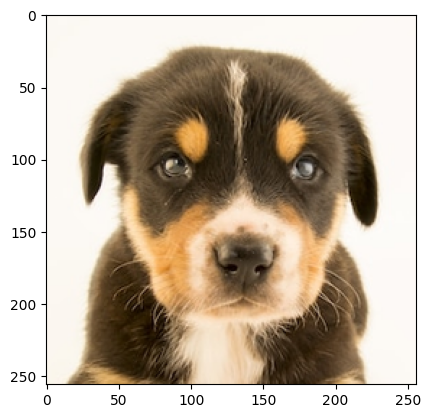

[('EntleBucher', '25.8%'), ('Appenzeller', '20.7%'), ('Greater Swiss Mountain dog', '13.1%'), ('Eskimo dog, husky', '0.5%'), ('beagle', '0.3%')]


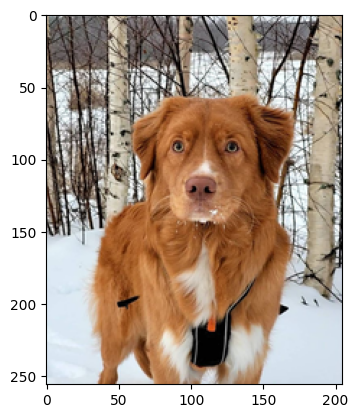

[('Brittany spaniel', '16.4%'), ('Border collie', '16.4%'), ('collie', '6.8%'), ('tennis ball', '4.6%'), ('Chesapeake Bay retriever', '3.1%')]


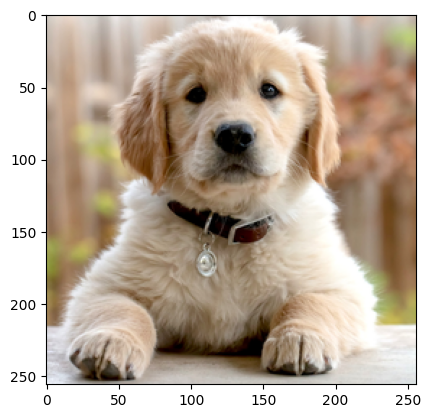

[('golden retriever', '74.6%'), ('Brittany spaniel', '2.6%'), ('Labrador retriever', '0.7%'), ('clumber, clumber spaniel', '0.5%'), ('curly-coated retriever', '0.3%')]


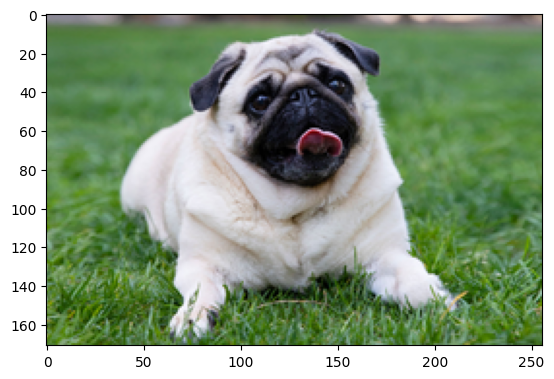

[('pug, pug-dog', '71.8%'), ('bull mastiff', '1.4%'), ('Brabancon griffon', '0.9%'), ('Saint Bernard, St Bernard', '0.2%'), ('chow, chow chow', '0.2%')]


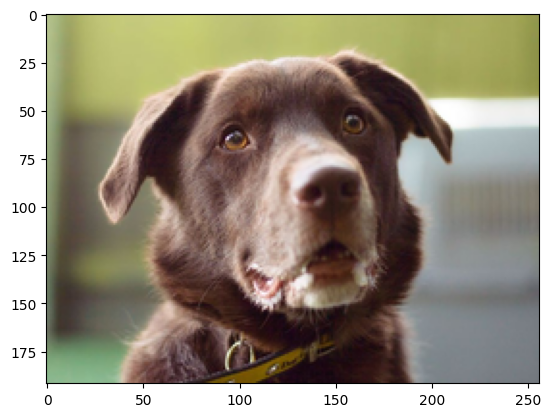

[('Labrador retriever', '55.5%'), ('kelpie', '6.4%'), ('flat-coated retriever', '2.7%'), ('German short-haired pointer', '2.0%'), ('tennis ball', '1.4%')]


In [5]:

# setup torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

# load model
resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

resnet50.eval().to(device)

# prep sample images
# uris = [
#     'http://images.cocodataset.org/test-stuff2017/000000024309.jpg',
#     'http://images.cocodataset.org/test-stuff2017/000000028117.jpg',
#     'http://images.cocodataset.org/test-stuff2017/000000006149.jpg',
#     'http://images.cocodataset.org/test-stuff2017/000000004954.jpg',
# ]

uris = [
        "https://i.natgeofe.com/n/4f5aaece-3300-41a4-b2a8-ed2708a0a27c/domestic-dog_thumb_square.jpg?wp=1&w=272&h=272",
        "https://i.pinimg.com/736x/ab/e5/5f/abe55ff1a275ae726657fb1d03a37a97.jpg",
        "https://kb.rspca.org.au/wp-content/uploads/2018/11/golder-retriever-puppy.jpeg",
        "https://www.thesprucepets.com/thmb/hxWjs7evF2hP1Fb1c1HAvRi_Rw0=/2765x0/filters:no_upscale():strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg",
        "https://www.dogstrust.org.uk/images/800x600/assets/2023-12/Web%20header%20image-dexter_outdoors_kenilworth_dogstrust.jpg"
]

batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)

# run inference
with torch.no_grad():
    output = torch.nn.functional.softmax(resnet50(batch), dim=1)
    
results = utils.pick_n_best(predictions=output, n=5)

# display result
for uri, result in zip(uris, results):
    img = Image.open(requests.get(uri, stream=True).raw)
    img.thumbnail((256,256), Image.LANCZOS)
    plt.imshow(img)
    plt.show()
    print(result)

In [32]:
from torchvision.models import resnet50

In [ ]:
resnet50

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.hub
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
# define UDF

## Running a model with UDFs

Next, let's try to run a deep learning model to classify each image. Models are expensive to initialize and load, so we want to do this as few times as possible, and share a model across multiple invocations.

For the convenience of this quickstart tutorial, we pre-trained a model using a PyTorch-provided example script and saved the trained weights at https://github.com/Eventual-Inc/mnist-json/raw/master/mnist_cnn.pt.  We need to define the same deep learning model "scaffold" as the trained model that we want to load (this part is all PyTorch and is not specific at all to DaFt)

In [ ]:
# run ML classifier on dog images?
# or point to separate tutorial where we do that?

In [3]:
import datetime

df = daft.from_pydict({
    "integers": [1, 2, 3, 4],
    "floats": [1.5, 2.5, 3.5, 4.5],
    "bools": [True, True, False, False],
    "strings": ["a", "b", "c", "d"],
    "bytes": [b"a", b"b", b"c", b"d"],
    "dates": [datetime.date(1994, 1, 1), datetime.date(1994, 1, 2), datetime.date(1994, 1, 3), datetime.date(1994, 1, 4)],
    "lists": [[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]],
    "nulls": [None, None, None, None],
})
df

integersInt64,floatsFloat64,boolsBoolean,stringsUtf8,bytesBinary,datesDate,listsList[Int64],nullsNull
1,1.5,true,a,"b""a""",1994-01-01,"[1, 1, 1]",None
2,2.5,true,b,"b""b""",1994-01-02,"[2, 2, 2]",None
3,3.5,false,c,"b""c""",1994-01-03,"[3, 3, 3]",None
4,4.5,false,d,"b""d""",1994-01-04,"[4, 4, 4]",None


You can also load DataFrames from other sources, such as:

1. CSV files: {func}`daft.read_csv("s3://bucket/*.csv") <daft.read_csv>`
2. Parquet files: {func}`daft.read_parquet("/path/*.parquet") <daft.read_parquet>`
3. JSON line-delimited files: {func}`daft.read_json("/path/*.parquet") <daft.read_json>`
4. Files on disk: {func}`daft.from_glob_path("/path/*.jpeg") <daft.from_glob_path>`

Daft automatically supports local paths as well as paths to object storage such as AWS S3.

Let's try to select the columns from our DataFrame that are not nulls:

In [26]:
df = df.select("integers", "floats", "bools", "strings", "bytes", "dates", "lists")
df

integersInt64,floatsFloat64,boolsBoolean,stringsUtf8,bytesBinary,datesDate,listsList[Int64]


Another example of a useful method accessor is the {meth}`.url <daft.expressions.Expression.url>` accessor. You can use {meth}`.url.download() <daft.expressions.expressions.ExpressionUrlNamespace.download>` to download data from a column of URLs like so:

In [14]:
image_url_df = daft.from_pydict({
    "urls": [
        "http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg",
        "http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg",
        "http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg",
    ],
})
image_downloaded_df = image_url_df.with_column("image_bytes", image_url_df["urls"].url.download())
image_downloaded_df.collect()

urlsUtf8,image_bytesBinary
http://farm9.staticflickr.com/8186/8119368305_4e622c8349_...,b'\xff\xd8\xff\xe1\x00TExif\x00\x00MM\x00*\x00\x00\x00\x0...
http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg,b'\xff\xd8\xff\xe1\x00(Exif\x00\x00MM\x00*\x00\x00\x00\x0...
http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_...,b'\xff\xd8\xff\xe1\x00\x16Exif\x00\x00MM\x00*\x00\x00\x00...


For a full list of all Expression methods and operators, see: [Expressions API Docs](api_docs/expressions.rst)

## Python object columns

Daft Dataframes can also contain Python objects. Here is an example of how to create a dataframe with Python objects.

In [15]:
# Let's define a toy example of a Python class!
class Dog:
    def __init__(self, name):
        self.name = name
        
    def bark(self):
        return f"{self.name}!"

py_df = daft.from_pydict({
    "dogs": [Dog("ruffles"), Dog("waffles"), Dog("doofus")],
    "owner": ["russell", "william", "david"],
})

Now, when we print our dataframe we can see that it contains our `Dog` Python objects! Also note that the type of the column is {meth}`Python <daft.DataType.python>`.

In [16]:
py_df.collect()

dogsPython,ownerUtf8
<__main__.Dog object at 0x11ef78ac0>,russell
<__main__.Dog object at 0x11ef78430>,william
<__main__.Dog object at 0x11ef78040>,david


To work with {meth}`Python <daft.DataType.python>` type columns, Daft provides a few useful Expression methods.

{meth}`.apply() <daft.expressions.Expression.apply>` is useful to work on each Dog individually and apply a function.

Here's an example where we extract a string from each `Dog` by calling `.bark()` on each `Dog` object and return a new `Utf8` column.

In [17]:
py_df.with_column(
    "dogs_bark_name",
    py_df["dogs"].apply(lambda dog: dog.bark(), return_dtype=DataType.string()),
).collect()

dogsPython,ownerUtf8,dogs_bark_nameUtf8
<__main__.Dog object at 0x11ef78ac0>,russell,ruffles!
<__main__.Dog object at 0x11ef78430>,william,waffles!
<__main__.Dog object at 0x11ef78040>,david,doofus!


### User-Defined Functions

{meth}`.apply() <daft.expressions.Expression.apply>` makes it really easy to map a function on a single column, but is limited in 2 main ways:

1. Only runs on a single column: some algorithms require multiple columns as inputs
2. Only runs on a single row: some algorithms run much more efficiently when run on a batch of rows instead

To overcome these limitations, you can use User-Defined Functions (UDFs).

See Also: [UDF User Guide](user_guide/daft_in_depth/udf)

In [18]:
from daft import udf

@udf(return_dtype=DataType.string())
def custom_bark(dog_series, owner_series):
    return [
        f"{dog.name} loves {owner_name}!"
        for dog, owner_name
        in zip(dog_series.to_pylist(), owner_series.to_pylist())
    ]

py_df.with_column("custom_bark", custom_bark(py_df["dogs"], py_df["owner"])).collect()

dogsPython,ownerUtf8,custom_barkUtf8
<__main__.Dog object at 0x11ef78ac0>,russell,ruffles loves russell!
<__main__.Dog object at 0x11ef78430>,william,waffles loves william!
<__main__.Dog object at 0x11ef78040>,david,doofus loves david!


## Missing Data

All columns in Daft are "nullable" by default. Unlike other frameworks such as Pandas, Daft differentiates between "null" (missing) and "nan" (stands for not a number - a special value indicating an invalid float).

In [20]:
missing_data_df = daft.from_pydict({
    "floats": [1.5, None, float("nan")],
})
missing_data_df = missing_data_df \
    .with_column("floats_is_null", missing_data_df["floats"].is_null()) \
    .with_column("floats_is_nan", missing_data_df["floats"].float.is_nan())

missing_data_df.collect()

floatsFloat64,floats_is_nullBoolean,floats_is_nanBoolean
1.5,false,false
None,true,none
nan,false,true


To fill in missing values, a useful Expression is the {meth}`.if_else <daft.expressions.Expression.if_else>` expression which can be used to fill in values if the value is null:

In [21]:
missing_data_df = missing_data_df.with_column("filled_in_floats", (missing_data_df["floats"].is_null()).if_else(0.0, missing_data_df["floats"]))
missing_data_df.collect()

floatsFloat64,floats_is_nullBoolean,floats_is_nanBoolean,filled_in_floatsFloat64
1.5,false,false,1.5
None,true,none,0
nan,false,true,nan


## Merging Dataframes

DataFrames can be joined with {meth}`df.join() <daft.DataFrame.join>`. Here is a naive example of a self-join where we join `df` on itself with column "A" as the join key.

In [22]:
joined_df = df.join(df, on="integers")

In [23]:
joined_df.collect()

integersInt64,floatsFloat64,boolsBoolean,stringsUtf8,bytesBinary,datesDate,listsList[Int64],right.floatsFloat64,right.boolsBoolean,right.stringsUtf8,right.bytesBinary,right.datesDate,right.listsList[Int64]
1,1.5,true,a,b'a',1994-01-01,"[1, 1, 1]",1.5,true,a,b'a',1994-01-01,"[1, 1, 1]"
2,2.5,true,b,b'b',1994-01-02,"[2, 2, 2]",2.5,true,b,b'b',1994-01-02,"[2, 2, 2]"
3,3.5,false,c,b'c',1994-01-03,"[3, 3, 3]",3.5,false,c,b'c',1994-01-03,"[3, 3, 3]"
4,4.5,false,d,b'd',1994-01-04,"[4, 4, 4]",4.5,false,d,b'd',1994-01-04,"[4, 4, 4]"


## Writing Data

See: [Writing Data](df-writing-data)

Writing data will execute your DataFrame and write the results out to the specified backend. For example, to write data out to Parquet with {meth}`df.write_parquet() <daft.DataFrame.write_parquet>`:


In [5]:
written_df = df.write_parquet("my-dataframe.parquet")

Note that writing your dataframe is a **blocking** operation that executes your DataFrame. It will return a new `DataFrame` that contains the filepaths to the written data:

In [6]:
written_df

pathUtf8
my-dataframe.parquet/d796131c-0c31-4688-a5ee-48ca500498e3-0.parquet
